In [1]:
from mhr.utils.utils import process_jsonl
token_input_file="/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-Instruct-150K/reverse_index/llava_v1_5_mix665k_token_reverse_index.jsonl"
object_input_file="/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-Instruct-150K/reverse_index/llava_v1_5_mix665k_dino_stat_reverse_index.jsonl"
co_occurrence_input_file="/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-Instruct-150K/reverse_index/llava_v1_5_mix665k_co_occurrence_reverse_index.jsonl"
what_word_input_file="/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-Instruct-150K/reverse_index/llava_v1_5_mix665k_what_word_reverse_index.jsonl"



In [2]:
token_data = process_jsonl(token_input_file)
object_data = process_jsonl(object_input_file)
co_occurrence_data = process_jsonl(co_occurrence_input_file)
what_word_data = process_jsonl(what_word_input_file)

token_data.sort(key=lambda x: len(x["ids"]), reverse=True)
object_data.sort(key=lambda x: len(x["ids"]), reverse=True)
co_occurrence_data.sort(key=lambda x: len(x["ids"]), reverse=True)
what_word_data.sort(key=lambda x: len(x["ids"]), reverse=True)

token_data = [(x["object"],len(x["ids"])) for x in token_data]
object_data = [(x["object"],len(x["ids"])) for x in object_data]
co_occurrence_data = [(x["object"],len(x["ids"])) for x in co_occurrence_data]
what_word_data = [(x["object"],len(x["ids"])) for x in what_word_data]

token_sum = sum([x[1] for x in token_data])
object_sum = sum([x[1] for x in object_data])
co_occurrence_sum = sum([x[1] for x in co_occurrence_data])
what_word_sum = sum([x[1] for x in what_word_data])



In [3]:
def get_90_index(data,sum,ratio=0.9):
    sum_90 = sum*ratio
    sum_temp = 0
    for i in range(len(data)):
        sum_temp += data[i][1]
        if sum_temp >= sum_90:
            return i
        
token_threshold = 0.9
object_threshold = 0.9
co_occurrence_threshold = 0.75
what_word_threshold = 0.9

token_90_loc = get_90_index(token_data,token_sum,0.9)
object_90_loc = get_90_index(object_data,object_sum,0.9)
co_occurrence_90_loc = get_90_index(co_occurrence_data,co_occurrence_sum,0.75)
what_word_90_loc = get_90_index(what_word_data,what_word_sum)
print(f"token_90_loc:{token_90_loc}, object_90_loc:{object_90_loc}, co_occurrence_90_loc:{co_occurrence_90_loc}, what_word_90_loc:{what_word_90_loc}")
print(f"token_total {len(token_data)} object_total {len(object_data)} co_occurrence_total {len(co_occurrence_data)} what_word_total {len(what_word_data)}")

token_90_loc:6745, object_90_loc:2222, co_occurrence_90_loc:78082, what_word_90_loc:25
token_total 512151 object_total 113149 co_occurrence_total 1065602 what_word_total 5770


In [4]:
token_data[6745]
len([i for i in token_data if i < token_data[6745]])/len(token_data)
1-(token_90_loc)/len(token_data)
print(f"token < 90%:{1-(token_90_loc)/len(token_data)}, object < 90%:{1-(object_90_loc)/len(object_data)}, co_occurrence < 90%:{1-(co_occurrence_90_loc)/len(co_occurrence_data)}, what_word < 90%:{1-(what_word_90_loc)/len(what_word_data)}")

token < 90%:0.9868300559795842, object < 90%:0.9803621773060301, co_occurrence < 90%:0.9267249873780267, what_word < 90%:0.9956672443674177


In [5]:
print(f"token threshold:{token_data[token_90_loc]}, object threshold:{object_data[object_90_loc]}, co_occurrence threshold:{co_occurrence_data[co_occurrence_90_loc]}, what_word threshold:{what_word_data[what_word_90_loc]}")

token threshold:('KaplanWhat', 120), object threshold:('wastebasket', 304), co_occurrence threshold:('baseball player player,photo', 24), what_word threshold:("what's", 4895)


In [6]:
token_level_res = f"Token & {token_data[token_90_loc][1]} &  {(token_90_loc)/len(token_data)*100 :.2f} ({token_90_loc}/{len(token_data)}) & {token_threshold*100} ({int(0.9*token_sum)}/{token_sum}) \\\\\n"
object_level_res = f"Object & {object_data[object_90_loc][1]} &  {(object_90_loc)/len(object_data)*100 :.2f} ({object_90_loc}/{len(object_data)}) & {object_threshold*100} ({int(0.9*object_sum)}/{object_sum}) \\\\\n"
co_occurrence_level_res = f"Co-occurrence & {co_occurrence_data[co_occurrence_90_loc][1]} &  {(co_occurrence_90_loc)/len(co_occurrence_data)*100 :.2f} ({co_occurrence_90_loc}/{len(co_occurrence_data)}) & {co_occurrence_threshold*100} ({int(0.75*co_occurrence_sum)}/{co_occurrence_sum}) \\\\\n"
what_word_level_res = f"Interrogation & {what_word_data[what_word_90_loc][1]} &  {(what_word_90_loc)/len(what_word_data)*100 :.2f} ({what_word_90_loc}/{len(what_word_data)}) & {what_word_threshold*100} ({int(0.9*what_word_sum)}/{what_word_sum}) \\\\\n"
res = token_level_res + object_level_res + co_occurrence_level_res + what_word_level_res
print(res)


Token & 120 &  1.32 (6745/512151) & 90.0 (14007346/15563718) \\
Object & 304 &  1.96 (2222/113149) & 90.0 (12135951/13484390) \\
Co-occurrence & 24 &  7.33 (78082/1065602) & 75.0 (15655047/20873397) \\
Interrogation & 4895 &  0.43 (25/5770) & 90.0 (1431772/1590858) \\



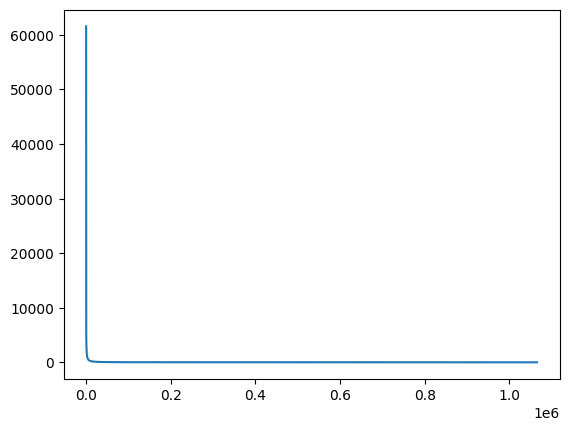

In [7]:
from matplotlib import pyplot as plt
plt.plot([x[1] for x in co_occurrence_data])